In [40]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
from networks.autoencoder import AutoEncoder
from networks.composedautoencoder import ComposedAutoEncoder
from dataset import NumpyCsvDataSet

import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter

import numpy as np
import matplotlib.pyplot as plt
import time
import os
from io import StringIO

In [42]:
opt = np.get_printoptions()
np.set_printoptions(threshold=np.inf)

In [43]:
data_folder = 'data/demoplanner/version1'
train_data = NumpyCsvDataSet(data_folder + '/train.csv')
test_data = NumpyCsvDataSet(data_folder + '/test.csv')
train_data = train_data.data/255.
test_data = test_data.data/255.

training_loader = DataLoader(train_data, batch_size=50, shuffle=True)
test_loader = DataLoader(test_data, batch_size=3, shuffle=True)

In [44]:
print (train_data.data.shape)
print (test_data.data.shape)

torch.Size([13280, 2058])
torch.Size([1341, 2058])


In [45]:
x_dim = 2
img_res = 32
img_size = img_res * img_res

In [46]:
%reset -f AutoEncoder
%reset -f ComposedAutoEncoder
%reset -f net

Don't know how to reset  autoencoder, please run `%reset?` for details
Don't know how to reset  composedautoencoder, please run `%reset?` for details
Don't know how to reset  net, please run `%reset?` for details


In [47]:
class autoencoder(torch.torch.nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1), #bias=False
            torch.nn.ReLU(True),
            torch.nn.MaxPool2d(2, stride=2),
            torch.nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(True),
            torch.nn.MaxPool2d(2, stride=2),
            torch.nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(True),
            torch.nn.MaxPool2d(2, stride=2),
        )
        self.decoder = torch.nn.Sequential(
            torch.nn.ConvTranspose2d(16, 16, kernel_size=3, stride=2, padding=1, output_padding=1),
            torch.nn.ReLU(True),
            torch.nn.ConvTranspose2d(16, 16, kernel_size=3, stride=2, padding=1, output_padding=1),
            torch.nn.ReLU(True),
            torch.nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
net = autoencoder()

print(net)

for name, param in net.named_parameters():
    if param.requires_grad:
        print(name, len(param.data))


autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): ConvTranspose2d(16, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1

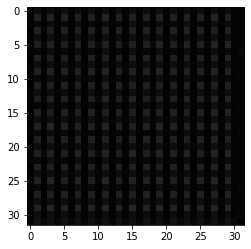

---------------------------------------
Iteration 0
MAE on train set 0.015200335532426834
MAE on test set 0.015357334166765213


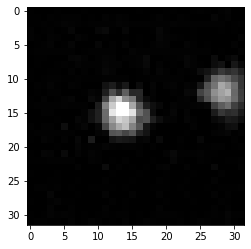

---------------------------------------
Iteration 100
MAE on train set 0.004006269387900829
MAE on test set 0.004177029710263014


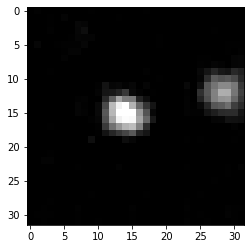

---------------------------------------
Iteration 200
MAE on train set 0.003038001013919711
MAE on test set 0.0031402281019836664


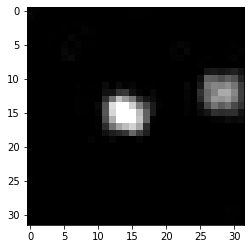

---------------------------------------
Iteration 300
MAE on train set 0.0025810336228460073
MAE on test set 0.0026742115151137114


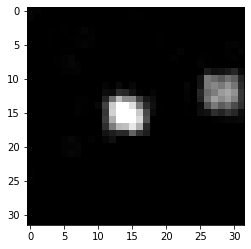

---------------------------------------
Iteration 400
MAE on train set 0.0021990486420691013
MAE on test set 0.0022985555697232485


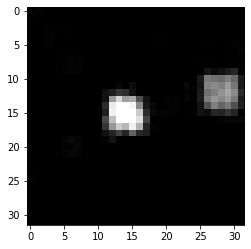

---------------------------------------
Iteration 500
MAE on train set 0.001897707348689437
MAE on test set 0.001989443553611636


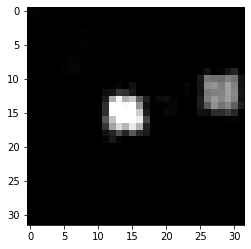

---------------------------------------
Iteration 600
MAE on train set 0.0016720903804525733
MAE on test set 0.001752357347868383


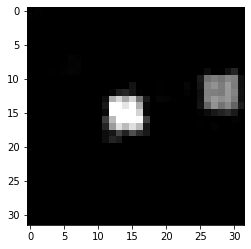

---------------------------------------
Iteration 700
MAE on train set 0.0014784522354602814
MAE on test set 0.0015550958923995495


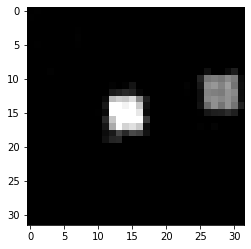

---------------------------------------
Iteration 800
MAE on train set 0.0013292034855112433
MAE on test set 0.0014024629490450025


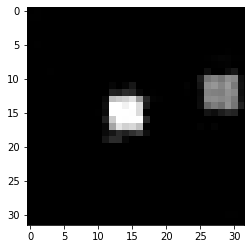

---------------------------------------
Iteration 900
MAE on train set 0.0012086040806025267
MAE on test set 0.0012848058249801397


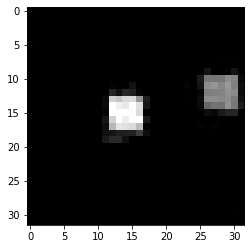

---------------------------------------
Iteration 1000
MAE on train set 0.001111093908548355
MAE on test set 0.0011774363229051232


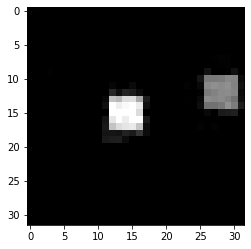

---------------------------------------
Iteration 1100
MAE on train set 0.0010425973450765014
MAE on test set 0.0011117204558104277


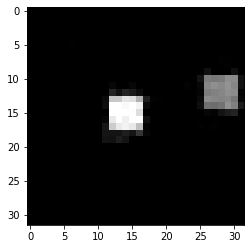

---------------------------------------
Iteration 1200
MAE on train set 0.0009857343975454569
MAE on test set 0.001049153390340507


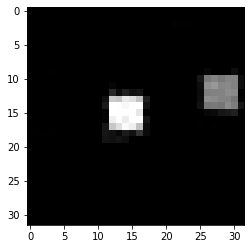

---------------------------------------
Iteration 1300
MAE on train set 0.0009330035536549985
MAE on test set 0.0009945817291736603


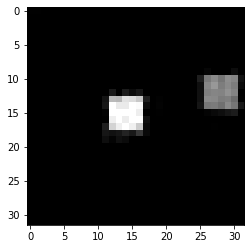

---------------------------------------
Iteration 1400
MAE on train set 0.0009027214837260544
MAE on test set 0.0009625286911614239


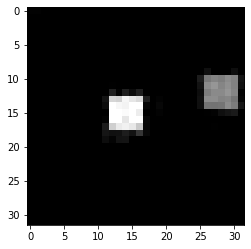

---------------------------------------
Iteration 1500
MAE on train set 0.0008732273709028959
MAE on test set 0.0009266426786780357


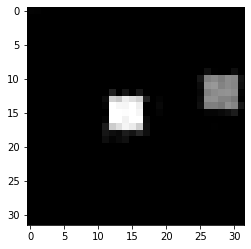

---------------------------------------
Iteration 1600
MAE on train set 0.0008336393511854112
MAE on test set 0.0008831212762743235


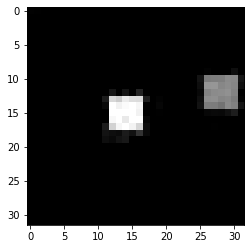

---------------------------------------
Iteration 1700
MAE on train set 0.000807317323051393
MAE on test set 0.0008580471039749682


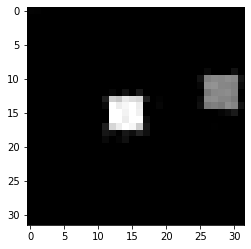

---------------------------------------
Iteration 1800
MAE on train set 0.0007823036285117269
MAE on test set 0.0008319363696500659


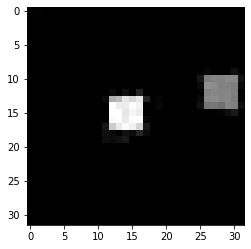

---------------------------------------
Iteration 1900
MAE on train set 0.0007658684626221657
MAE on test set 0.0008167329942807555


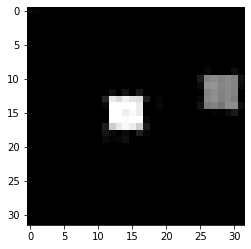

---------------------------------------
Iteration 2000
MAE on train set 0.0007469519041478634
MAE on test set 0.0007909784326329827


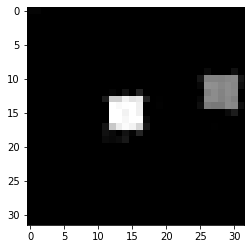

---------------------------------------
Iteration 2100
MAE on train set 0.000721065909601748
MAE on test set 0.0007688463083468378


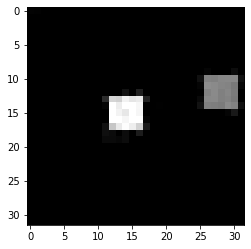

---------------------------------------
Iteration 2200
MAE on train set 0.0007068173144944012
MAE on test set 0.0007542315870523453


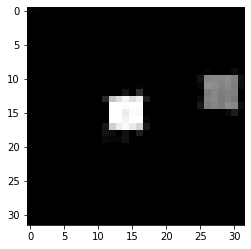

---------------------------------------
Iteration 2300
MAE on train set 0.0006911277305334806
MAE on test set 0.0007389293168671429


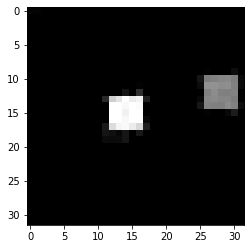

---------------------------------------
Iteration 2400
MAE on train set 0.000671745277941227
MAE on test set 0.0007185190916061401


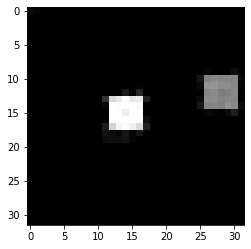

---------------------------------------
Iteration 2500
MAE on train set 0.0006656484329141676
MAE on test set 0.0007123186951503158


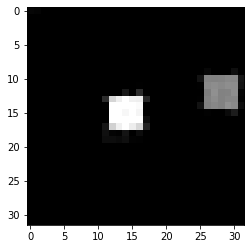

---------------------------------------
Iteration 2600
MAE on train set 0.000651977607049048
MAE on test set 0.0006964371423237026


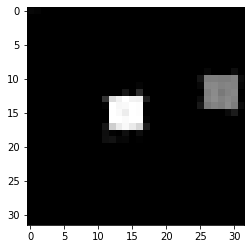

---------------------------------------
Iteration 2700
MAE on train set 0.0006397289107553661
MAE on test set 0.0006876775296404958


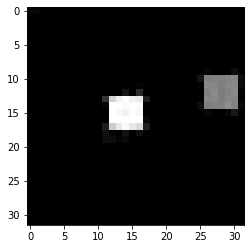

---------------------------------------
Iteration 2800
MAE on train set 0.0006267181597650051
MAE on test set 0.0006738146767020226


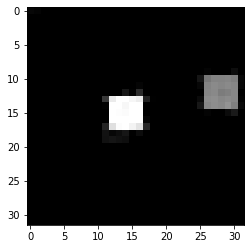

---------------------------------------
Iteration 2900
MAE on train set 0.0006222673109732568
MAE on test set 0.0006674720789305866


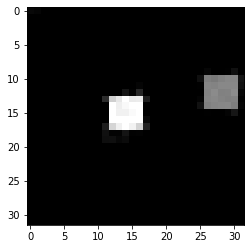

---------------------------------------
Iteration 3000
MAE on train set 0.0006112753180786967
MAE on test set 0.0006596455350518227


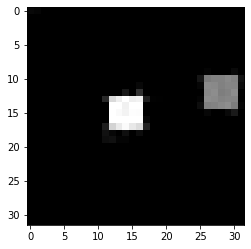

---------------------------------------
Iteration 3100
MAE on train set 0.0005968685727566481
MAE on test set 0.0006451393128372729


In [ ]:
num_iterations = 10000
batch_size = 200
eval_freq = 100

criterion = torch.nn.SmoothL1Loss()
optimizer = torch.optim.Adam(net.parameters())
for i in range(num_iterations):
    net.zero_grad()
    optimizer.zero_grad()

    ind = np.random.randint(0, train_data.data.shape[0], size=batch_size)
    input = torch.FloatTensor(train_data.data[ind, 2:1026].float())
    input = torch.reshape(input, [-1, 1, 32, 32])
    output = net(input)

    loss = criterion(input=output, target=input)
    loss.backward()
    optimizer.step()

    if i % eval_freq == 0:
        input = torch.FloatTensor(train_data.data[:, 2:1026].float())
        input = torch.reshape(input, [-1, 1, 32, 32])
        output = net(input)
        # train_mae = torch.mean(torch.abs(input-output), dim=0)
        train_error = criterion(input=output, target=input)

        input = torch.FloatTensor(test_data.data[:, 2:1026].float())
        input = torch.reshape(input, [-1, 1, 32, 32])
        output = net(input)
        test_error = criterion(input=output, target=input)

        plt.imshow(output.data[0, 0, :, :], cmap=plt.get_cmap("gray"), vmin=0, vmax=1)
        plt.show()

        print("---------------------------------------")
        print(f"Iteration {i}")
        # print(f"MAE on train set {train_mae}")
        print(f"MAE on train set {train_error}")
        # print(f"MAE on test set {test_mae}")
        print(f"MAE on test set {test_error}")

In [ ]:
input = torch.FloatTensor(test_data.data[:, 2:1026].float())
input = torch.reshape(input, [-1, 1, 32, 32])
output = net(input)
for i in range(5):
    print('datapoint', str(i), 'test error', criterion(input=input.data[i, 0, :, :], target=output.data[i, 0, :, :]))
    plt.imshow(input.data[i, 0, :, :], cmap=plt.get_cmap("gray"), vmin=0, vmax=1)
    plt.show()
    plt.imshow(output.data[i, 0, :, :], cmap=plt.get_cmap("gray"), vmin=0, vmax=1)
    plt.show()

In [ ]:
input = torch.FloatTensor(train_data.data[:, 2:1026].float())
input = torch.reshape(input, [-1, 1, 32, 32])
output = net(input)
for i in range(5):
    print('datapoint', str(i), 'train error', criterion(input=input.data[i, 0, :, :], target=output.data[i, 0, :, :]))
    plt.imshow(input.data[i, 0, :, :], cmap=plt.get_cmap("gray"), vmin=0, vmax=1)
    plt.show()
    plt.imshow(output.data[i, 0, :, :], cmap=plt.get_cmap("gray"), vmin=0, vmax=1)
    plt.show()